In [163]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [164]:
num_samples_each = 1000
negative_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov=[[0.5,1],[1,0.5]],
    size=num_samples_each
)
positive_samples = np.random.multivariate_normal(
    mean = [-2, -3],
    cov=[[0.5,1],[1,0.5]],
    size=num_samples_each
)

<ipython-input-164-afa18f3b74d1>:2: RuntimeWarning: covariance is not positive-semidefinite.
  negative_samples = np.random.multivariate_normal(
<ipython-input-164-afa18f3b74d1>:7: RuntimeWarning: covariance is not positive-semidefinite.
  positive_samples = np.random.multivariate_normal(


In [165]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [166]:
inputs

array([[ 3.0013533 , -1.0467031 ],
       [ 3.8813157 ,  0.46714714],
       [ 4.8740234 ,  1.8731064 ],
       ...,
       [-3.526901  , -2.120305  ],
       [-1.6402757 , -2.9972491 ],
       [-4.160941  , -4.397577  ]], dtype=float32)

In [167]:
targets = np.vstack(
    (
        np.zeros(shape=(num_samples_each, 1), dtype="float32"),
        np.ones(shape=(num_samples_each, 1), dtype="float32")
    )
)

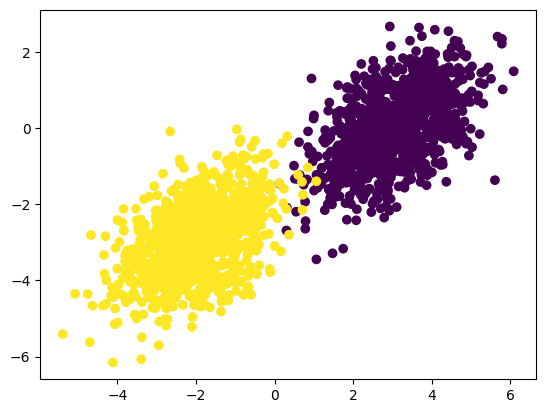

In [168]:
plt.scatter(x=inputs[:, 0], y=inputs[:, 1], c=targets[:, 0])

In [169]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, 1)))

In [170]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [171]:
def square_loss(predictions, targets):
    loss_per_samples = tf.square(predictions - targets)
    return tf.reduce_mean(loss_per_samples)

In [172]:
learning_rate = 0.001

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_wrt_W, grad_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_wrt_W * learning_rate)
    b.assign_sub(grad_wrt_b * learning_rate)
    return loss

In [173]:
for step in range(2000):
    loss = training_step(inputs, targets)
    if step % 50 == 0:
        print(f"loss at step {step}: {loss:.4f}")

loss at step 0: 2.9391
loss at step 50: 0.4644
loss at step 100: 0.1294
loss at step 150: 0.0826
loss at step 200: 0.0749
loss at step 250: 0.0727
loss at step 300: 0.0714
loss at step 350: 0.0703
loss at step 400: 0.0693
loss at step 450: 0.0683
loss at step 500: 0.0673
loss at step 550: 0.0664
loss at step 600: 0.0655
loss at step 650: 0.0646
loss at step 700: 0.0637
loss at step 750: 0.0629
loss at step 800: 0.0621
loss at step 850: 0.0613
loss at step 900: 0.0605
loss at step 950: 0.0598
loss at step 1000: 0.0591
loss at step 1050: 0.0584
loss at step 1100: 0.0577
loss at step 1150: 0.0570
loss at step 1200: 0.0564
loss at step 1250: 0.0558
loss at step 1300: 0.0551
loss at step 1350: 0.0545
loss at step 1400: 0.0540
loss at step 1450: 0.0534
loss at step 1500: 0.0529
loss at step 1550: 0.0523
loss at step 1600: 0.0518
loss at step 1650: 0.0513
loss at step 1700: 0.0508
loss at step 1750: 0.0504
loss at step 1800: 0.0499
loss at step 1850: 0.0495
loss at step 1900: 0.0490
loss at s

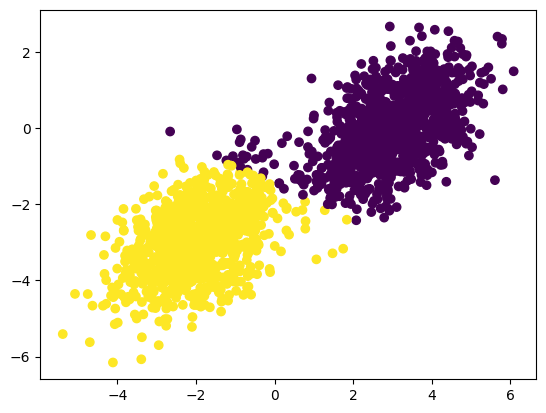

In [174]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)